In [1]:
# Data Import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

robotics = pd.read_csv("data/robotics.csv")
cooking = pd.read_csv("data/cooking.csv")
biology = pd.read_csv("data/biology.csv")
crypto = pd.read_csv("data/crypto.csv")
travel = pd.read_csv("data/travel.csv")
diy = pd.read_csv("data/diy.csv")             
test = pd.read_csv("data/test.csv") 

df_hash = {
    "cooking": cooking,
    "crypto": crypto,
    "robotics": robotics,
    "biology": biology,
    "travel": travel,
    "diy": diy,
    "test": test
}

In [2]:
# Data Exploration
print df_hash['biology'].columns.values

print df_hash['biology'].iloc[0]
print df_hash['biology'].iloc[1]
print df_hash['biology'].iloc[2]

print "\nNumber of rows by topic"
for topic, df in df_hash.iteritems():
    print topic + ": " +  str(len(df.index))

['id' 'title' 'content' 'tags']
id                                                         1
title      What is the criticality of the ribosome bindin...
content    <p>In prokaryotic translation, how critical fo...
tags       ribosome binding-sites translation synthetic-b...
Name: 0, dtype: object
id                                                         2
title      How is RNAse contamination in RNA based experi...
content    <p>Does anyone have any suggestions to prevent...
tags                                        rna biochemistry
Name: 1, dtype: object
id                                                         3
title          Are lymphocyte sizes clustered in two groups?
content    <p>Tortora writes in <em>Principles of Anatomy...
tags                      immunology cell-biology hematology
Name: 2, dtype: object

Number of rows by topic
biology: 13196
cooking: 15404
travel: 19279
robotics: 2771
crypto: 10432
diy: 25918
test: 81926


In [3]:
import nltk
# When running this notebook for first time,
# uncomment command below, select "stopwords" in gui, and follow prompt to download

# nltk.download()
from nltk.corpus import stopwords

# In Python, searching a set is much faster than searching a list, so convert the stop words to a set
stops = set(stopwords.words("english"))  

https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words

In [4]:
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer

def separate_tags(tags):
    return tags.split(" ")

def clean_data(raw_data):
    if raw_data:
        # remove html tags
        soup = BeautifulSoup(raw_data, "html.parser")

        [s.extract() for s in soup(['pre', 'code'])]
            
        question_text = soup.get_text()
        
        # remove everything but letters
        letters_only = re.sub("[^a-zA-Z]", " ", question_text) 
            
        # normalize case
        words = letters_only.lower().split()   

        # remove stopwords         
        meaningful_words = [w for w in words if not w in stops] 
        
        # remove permutations of the same word by reducing it to its stem
        wordnet_lemmatizer = WordNetLemmatizer()
        meaningful_word_stems = map(lambda x: wordnet_lemmatizer.lemmatize(x) , meaningful_words)
        return( " ".join( meaningful_word_stems )) 
    else:
        return ""

In [5]:
# Data Preprocessing

for topic, df in df_hash.iteritems():
    if topic == "test":
        next
    else:
        df.content = df.content.apply(lambda x: clean_data(x) )
        df.title = df.title.apply(lambda x: clean_data(x) )
        df.tags = df.tags.apply(lambda y: separate_tags(y) )
        # drop rows without tags
        df.tags.replace(['', ' ', 'untagged'], np.nan, inplace=True)
        df.dropna(subset=['tags'], inplace=True)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def top_tfidf_feats(row, features, top_n=20):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_indicies = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_indicies]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    x = np.arange(len(dfs["feature"]))
    fig = plt.figure(figsize=(12, 14), facecolor="w")

    ax = fig.add_subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
    ax.set_title( str(dfs.label), fontsize=16)
    ax.barh(x, dfs["tfidf"], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, len(x) +1])
    ax.set_xlim([0, 7])
    yticks = ax.set_yticklabels(dfs["feature"])
    plt.show()

In [7]:
from wordcloud import WordCloud

def print_wordcloud(dfs):
    text = ' '.join(str(x) for x in dfs.tags.values) 
    
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0, max_words=100,
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


biology
Finding terms with top tf-idf from question's titles


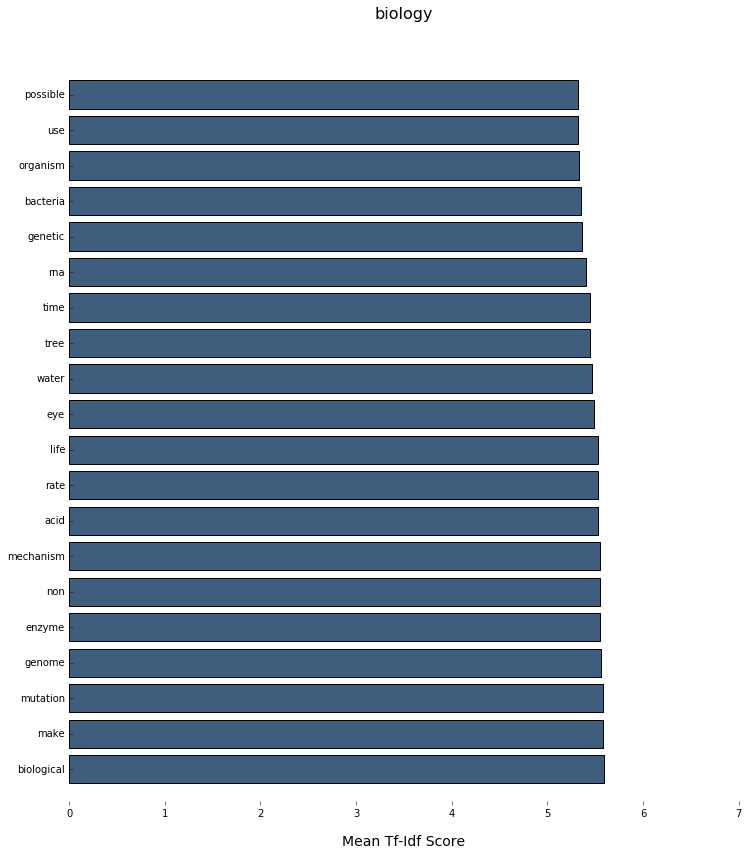

Finding most popular tags


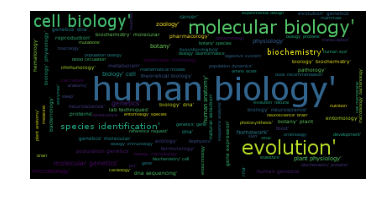

cooking
Finding terms with top tf-idf from question's titles


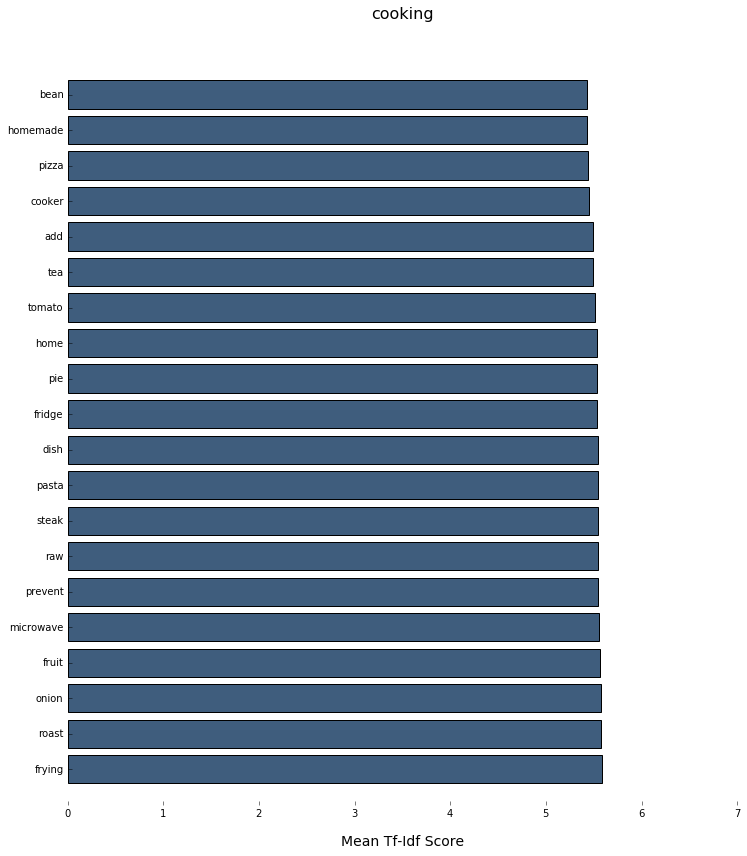

Finding most popular tags


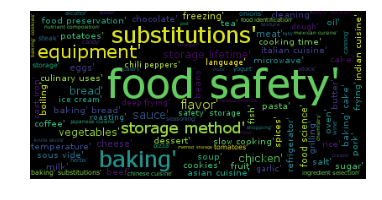

travel
Finding terms with top tf-idf from question's titles


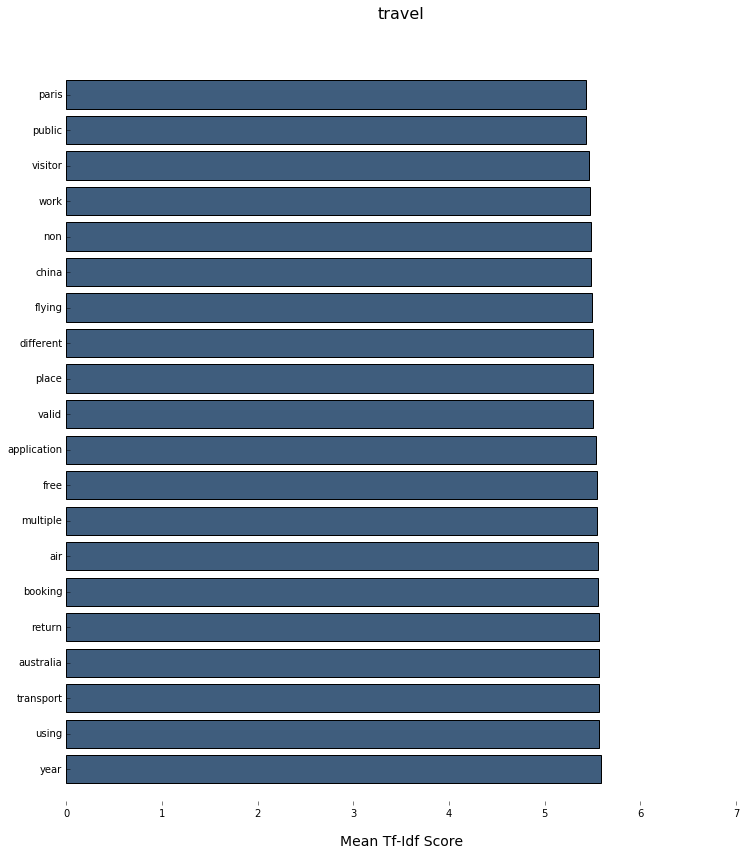

Finding most popular tags


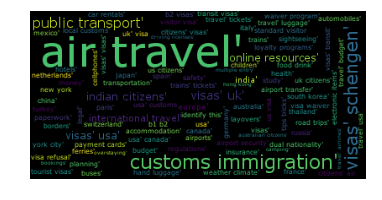

robotics
Finding terms with top tf-idf from question's titles


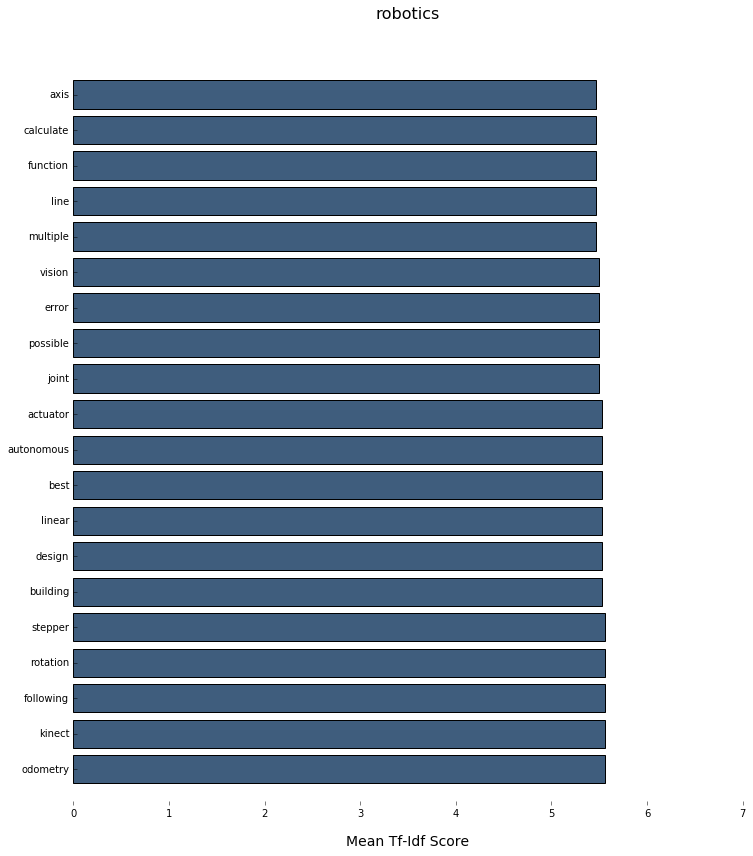

Finding most popular tags


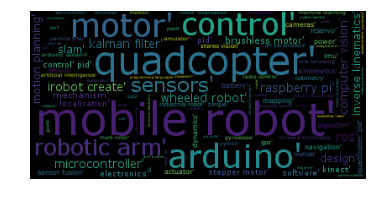

crypto
Finding terms with top tf-idf from question's titles


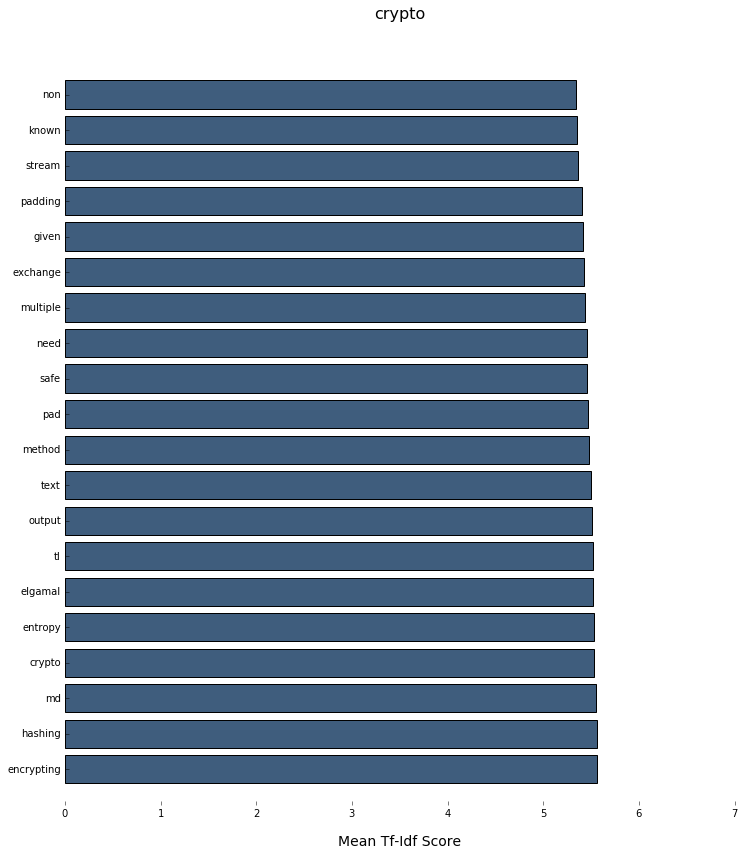

Finding most popular tags


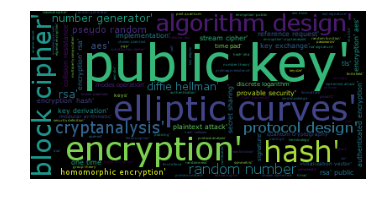

diy
Finding terms with top tf-idf from question's titles


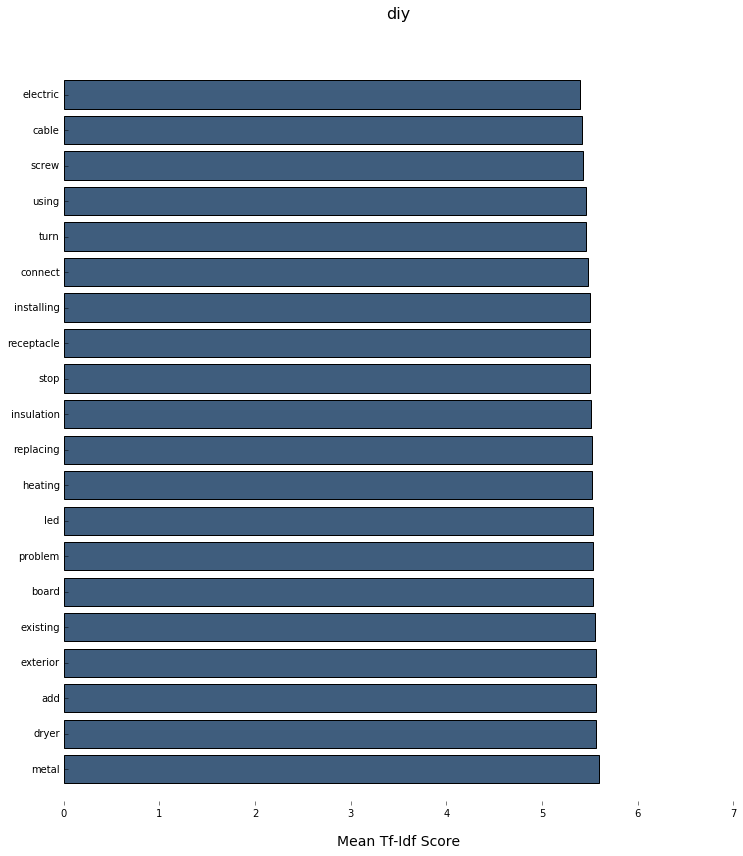

Finding most popular tags


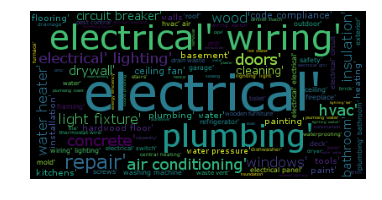

In [8]:
# Data Visualization

from sklearn.feature_extraction.text import TfidfVectorizer

vect_hash = {}

for topic, df in df_hash.iteritems():
    if topic == "test":
        next
    else:
        vect_hash[topic] = TfidfVectorizer( lowercase=True , stop_words="english" ,min_df=.01, max_df= .95 ) 
        X = vect_hash[topic].fit_transform(df.title)

        dfs = top_tfidf_feats( vect_hash[topic].idf_ , vect_hash[topic].get_feature_names()  ) 
        dfs.label = topic
        print topic
        print "Finding terms with top tf-idf from question's titles"
        plot_tfidf_classfeats_h(dfs)
        print "Finding most popular tags"
        print_wordcloud(df)

        

In [9]:
# Implementation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from time import time 
        
df = df_hash["robotics"]
# for topic, df in df_hash.iteritems():

parameters = {
    "tfidf__min_df" : [ 0.001, 0.005, 0.01 , 0.05],
    "tfidf__max_df" : [0.9, 0.95 , 0.975, 0.99],
    "DT_class__estimator__max_depth" : [10, 20, 50, 100, 200, 500],
    "DT_class__estimator__criterion" : ["gini", "entropy"]
    
}

steps = [('tfidf', TfidfVectorizer(lowercase=True, stop_words="english") ),
            ("DT_class", OneVsRestClassifier(DecisionTreeClassifier( random_state = 42)))]



pipeline = Pipeline(steps)
#     X_train, X_test, y_train, y_test_vect = train_test_split(df.content,\
#                                                         Y, \
#                                                         test_size=0.33,\
#                                                         random_state=42)
#     pipeline.fit(X_train, y_train)
#     y_predicted_vect = pipeline.predict(X_test)


mlb = MultiLabelBinarizer()
Y = pd.DataFrame( mlb.fit_transform(df.tags) )

t0 = time()
clf = GridSearchCV(pipeline, parameters, cv=3, scoring='f1_weighted')
clf.fit( df.content, Y )
print("done in %0.3fs" % (time() - t0))


/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 31 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 33 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 66 is present in all training examples.
  str(classes

done in 4293.580s


In [10]:

print clf.best_estimator_
print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
print best_parameters
print "\n\n"
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print "\n\n"
print clf.cv_results_.keys()



Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.001,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf...action_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          n_jobs=1))])
Best score: 0.316
Best parameters set:
{'tfidf__token_pattern': u'(?u)\\b\\w\\w+\\b', 'tfidf__tokenizer': None, 'DT_class__n_jobs': 1, 'DT_class__estimator__max_leaf_nodes': None, 'tfidf__lowercase': True, 'DT_class__estimator__min_samples_leaf': 1, 'DT_class__estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'), 'tfi

In [11]:
# for topic, df in df_hash.iteritems():
print "evaluating"
t0 = time()
y_prediction =  cross_val_predict(pipeline, df.content, Y, cv=10 )
print("done in %0.3fs" % (time() - t0))
print "y_prediction: \n"
print y_prediction.shape
print type(y_prediction)
print type(y_prediction[0])
#     print y_predicted_vect.to_dense

Y_inv = mlb.inverse_transform(y_prediction)
#     y_test_inv = mlb.inverse_transform(y_test_vect.values)
#     y_pred_inv = mlb.inverse_transform(y_predicted_vect)
#     y_pred_inv = y_predicted_vect.apply(lambda x: d[x].inverse_transform(x))
#     y_test_inv = y_test_vect.apply(lambda x: d[x].inverse_transform(x))

#     print clf.best_estimator_
print "baallss"
#     print Y_inv
print accuracy_score(Y, y_prediction) 
report = classification_report(Y, y_prediction) 
print(report)

#     print cv.best_score_
#     print cv.best_params_
#     print clf.feature_importances_  
#     model = SelectFromModel(clf, prefit=True)
#     print model





evaluating


/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 176 is present in all training examples.
  str(classes[c]))


done in 199.113s
y_prediction: 

(2771, 231)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
baallss
0.0364489354024
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.25      0.29      0.27        14
          2       0.00      0.00      0.00         9
          3       0.40      0.35      0.37        55
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         2
          6       0.42      0.38      0.40        47
          7       0.00      0.00      0.00         2
          8       0.04      0.04      0.04        52
          9       0.00      0.00      0.00         1
         10       0.57      0.55      0.56       282
         11       0.26      0.23      0.24        26
         12       0.11      0.09      0.10        22
         13       0.07      0.06      0.06        34
         14       0.00      0.00      0.00        16
         15       0.00      0.00    

/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# y = mlb.inverse_transform(Y)
index = 0
for actual, pred in zip(df.tags, Y_inv):
        print('index: {0} :: {1} => {2}'.format(index, actual, ', '.join(pred)))
        index = index +1

        

index: 0 :: ['soccer', 'control'] => control, pid, stepper-motor
index: 1 :: ['control', 'rcservo'] => servomotor
index: 2 :: ['gait', 'walk'] => esc, walking-robot
index: 3 :: ['microcontroller', 'arduino', 'raspberry-pi'] => line-following, raspberry-pi
index: 4 :: ['motion-planning', 'rrt'] => kinect, kinematics, visualization
index: 5 :: ['software', 'platform'] => 
index: 6 :: ['software', 'circuit'] => accelerometer, design, software
index: 7 :: ['odometry', 'localization', 'kalman-filter'] => kalman-filter, sonar
index: 8 :: ['untagged'] => programming-languages
index: 9 :: ['soccer', 'mechanism'] => actuator, motion
index: 10 :: ['computer-vision', 'wheeled-robot'] => 
index: 11 :: ['quadcopter'] => forward-kinematics, walking-robot
index: 12 :: ['servos'] => 
index: 13 :: ['localization', 'mobile-robot'] => localization, mapping, mobile-robot, occupancygrid, slam
index: 14 :: ['kinect', 'input'] => sensors
index: 15 :: ['wheel'] => 
index: 16 :: ['control', 'gyroscope', 'balan

In [13]:
print y_prediction.shape
# print y_test[0]

(2771, 231)


In [14]:
# print confusion_matrix(Y, y_prediction) 
# print y_pred_inv
# print mlb.inverse_transform(0)


https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/

In [15]:
# Numpy arrays are easy to work with, so convert the result to an 
# array
# train_data_features = train_data_features.toarray()
# report = classification_report(Y, y_prediction) 
# print report
f1_score(Y, y_prediction, average='weighted')

0.32361067414631128